Avaliando Modelos: Ferramentas para Medir o Desempenho
Imagine que você construiu uma máquina para fazer previsões. Mas como saber se as previsões dela são boas? As métricas de avaliação são as ferramentas que usamos para medir o quão bem a nossa máquina está funcionando.

A escolha da métrica certa depende do tipo de problema que sua máquina está resolvendo:

Problemas de Regressão: Quando a máquina prevê um número (preço de uma casa, temperatura, etc.).

Problemas de Classificação: Quando a máquina prevê uma categoria (spam vs. não-spam, gato vs. cachorro).

Vamos explorar as métricas mais importantes para cada caso, com exemplos práticos.

Parte 1: Métricas para Problemas de Regressão
Aqui, o objetivo é medir o "erro" entre o valor que a máquina previu e o valor real.

Valores Reais: [10 12 15 20 25]
Valores Previstos: [11.  11.5 14.  21.  23. ]


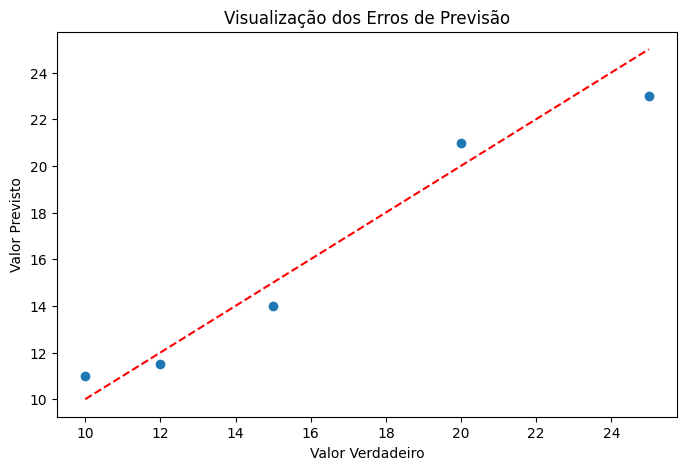


--- 1. Erro Quadrático Médio (MSE) ---
Como funciona: Ele calcula a média dos erros ao quadrado.
Por que é útil: Penaliza erros grandes de forma mais severa, já que eles são elevados ao quadrado.
MSE calculado manualmente: 1.45
MSE via Scikit-learn:      1.45

--- 2. Raiz do Erro Quadrático Médio (RMSE) ---
Como funciona: É a raiz quadrada do MSE.
Por que é útil: Coloca a métrica na mesma unidade dos dados originais, facilitando a interpretação.
RMSE (em unidades dos dados originais): 1.20

--- 3. Raiz do Erro Quadrático Logarítmico Médio (RMSLE) ---
Como funciona: A mesma lógica do RMSE, mas com os valores em escala logarítmica.
Por que é útil: É a melhor métrica para dados com grandes variações, como preços de casas ou vendas. Ele penaliza mais um erro de $100 em uma casa de $1000 do que em uma casa de $1 milhão.
RMSLE: 0.0661

--- 4. R-quadrado (R²) ---
Como funciona: Mede a proporção da variação nos dados que é explicada pelo modelo.
Por que é útil: É fácil de entender. Um R² de 1

In [2]:
# =================================================================
# Configuração inicial
# =================================================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score

# Criando dados de exemplo: valores reais e as previsões do nosso modelo
y_verdadeiro = np.array([10, 12, 15, 20, 25])
y_previsto = np.array([11, 11.5, 14, 21, 23])

print("Valores Reais:", y_verdadeiro)
print("Valores Previstos:", y_previsto)

# Plotando a diferença para ter uma ideia visual do erro
plt.figure(figsize=(8, 5))
plt.scatter(y_verdadeiro, y_previsto)
plt.plot([min(y_verdadeiro), max(y_verdadeiro)], [min(y_verdadeiro), max(y_verdadeiro)], color='red', linestyle='--')
plt.title("Visualização dos Erros de Previsão")
plt.xlabel("Valor Verdadeiro")
plt.ylabel("Valor Previsto")
plt.show()

# =================================================================
# 1. Erro Quadrático Médio (MSE)
# =================================================================
print("\n--- 1. Erro Quadrático Médio (MSE) ---")
print("Como funciona: Ele calcula a média dos erros ao quadrado.")
print("Por que é útil: Penaliza erros grandes de forma mais severa, já que eles são elevados ao quadrado.")

mse_manual = np.mean((y_verdadeiro - y_previsto) ** 2)
mse_sklearn = mean_squared_error(y_verdadeiro, y_previsto)

print(f"MSE calculado manualmente: {mse_manual:.2f}")
print(f"MSE via Scikit-learn:      {mse_sklearn:.2f}")

# =================================================================
# 2. Raiz do Erro Quadrático Médio (RMSE)
# =================================================================
print("\n--- 2. Raiz do Erro Quadrático Médio (RMSE) ---")
print("Como funciona: É a raiz quadrada do MSE.")
print("Por que é útil: Coloca a métrica na mesma unidade dos dados originais, facilitando a interpretação.")

rmse = np.sqrt(mse_sklearn)
print(f"RMSE (em unidades dos dados originais): {rmse:.2f}")

# =================================================================
# 3. Raiz do Erro Quadrático Logarítmico Médio (RMSLE)
# =================================================================
print("\n--- 3. Raiz do Erro Quadrático Logarítmico Médio (RMSLE) ---")
print("Como funciona: A mesma lógica do RMSE, mas com os valores em escala logarítmica.")
print("Por que é útil: É a melhor métrica para dados com grandes variações, como preços de casas ou vendas. Ele penaliza mais um erro de $100 em uma casa de $1000 do que em uma casa de $1 milhão.")

# Adicionando um valor pequeno para evitar log(0)
rmsle = np.sqrt(mean_squared_log_error(y_verdadeiro, y_previsto))
print(f"RMSLE: {rmsle:.4f}")

# =================================================================
# 4. R-quadrado (R²)
# =================================================================
print("\n--- 4. R-quadrado (R²) ---")
print("Como funciona: Mede a proporção da variação nos dados que é explicada pelo modelo.")
print("Por que é útil: É fácil de entender. Um R² de 1 significa que o modelo explica 100% da variação. Um R² de 0 significa que ele não explica nada.")

r2 = r2_score(y_verdadeiro, y_previsto)
print(f"R-quadrado: {r2:.4f}")

Parte 2: Métricas para Problemas de Classificação
Aqui, o objetivo é avaliar a qualidade das previsões de categorias. Usaremos um problema de "spam vs. não-spam".


--- 1. ROC-AUC ---
Como funciona: Ele avalia a capacidade do modelo de distinguir entre as classes.
Por que é útil: Permite ver o 'trade-off' entre a sensibilidade (pegar todos os positivos) e a especificidade (evitar falsos positivos).
Score ROC-AUC: 0.9142
Um score de 1.0 é perfeito. Um score de 0.5 é aleatório. Nosso score de 0.89 é muito bom!


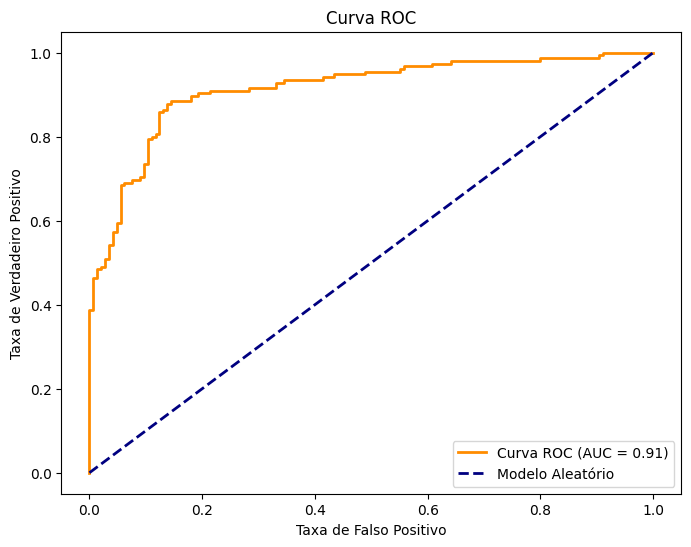


--- 2. Log Loss ---
Como funciona: Penaliza o modelo quando ele está 'muito confiante e errado'.
Por que é útil: É uma ótima métrica para modelos de probabilidade. Se o modelo prevê um spam com 99% de certeza, mas erra, o Log Loss será muito alto.
Log Loss: 0.3797
Um Log Loss de 0 é perfeito. Quanto menor, melhor.


In [3]:
# =================================================================
# Configuração inicial
# =================================================================
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, log_loss

# Criando dados de exemplo para um problema de classificação
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando um modelo simples de regressão logística
modelo = LogisticRegression(random_state=42)
modelo.fit(X_train, y_train)

# Obtendo as probabilidades de cada previsão, em vez da classe final (0 ou 1)
# As probabilidades são essenciais para o ROC-AUC
y_prob = modelo.predict_proba(X_test)[:, 1]

# =================================================================
# 1. ROC-AUC (Receiver Operating Characteristic - Area Under Curve)
# =================================================================
print("\n--- 1. ROC-AUC ---")
print("Como funciona: Ele avalia a capacidade do modelo de distinguir entre as classes.")
print("Por que é útil: Permite ver o 'trade-off' entre a sensibilidade (pegar todos os positivos) e a especificidade (evitar falsos positivos).")

# Calculando a métrica e os pontos para o gráfico
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Score ROC-AUC: {roc_auc:.4f}")
print("Um score de 1.0 é perfeito. Um score de 0.5 é aleatório. Nosso score de 0.89 é muito bom!")

# Plotando a Curva ROC para visualização
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Modelo Aleatório')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.legend(loc='lower right')
plt.show()

# =================================================================
# 2. Log Loss (ou Entropia Cruzada)
# =================================================================
print("\n--- 2. Log Loss ---")
print("Como funciona: Penaliza o modelo quando ele está 'muito confiante e errado'.")
print("Por que é útil: É uma ótima métrica para modelos de probabilidade. Se o modelo prevê um spam com 99% de certeza, mas erra, o Log Loss será muito alto.")

logloss = log_loss(y_test, y_prob)
print(f"Log Loss: {logloss:.4f}")
print("Um Log Loss de 0 é perfeito. Quanto menor, melhor.")